El  documento movies_dataset.csv posee varias columnas anidadas las cuales procederemos a desanidar

Importamos las librerías que usaremos 

In [2]:
import pandas as pd
import ast
import json
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Cargar el archivo movies_dataset en un DataFrame con low_memory=False
file_path = 'C:/Users/jrgsi/OneDrive/Escritorio/PROUECTOS HENRY/SISTEMA DE RECOMENDACION PELICULAS/datos/movies_dataset.csv'
movies_dataset = pd.read_csv(file_path, low_memory=False)

# Función para evaluar listas en cadenas
def evaluacion(value):
    if isinstance(value, list):
        return value
    if pd.isna(value) or value == '':
        return []
    try:
        return ast.literal_eval(value)
    except (SyntaxError, ValueError):
        return []

# Aplicamos la función de evaluación a las columnas que pueden tener listas como cadenas
columns_to_evaluate = ['genres', 'production_companies', 'production_countries', 'spoken_languages', 'belongs_to_collection']
for col in columns_to_evaluate:
    movies_dataset[col] = movies_dataset[col].apply(evaluacion)

# Proceso de desanidación usando explode y json_normalize
# Código de desanidación para cada columna (genres, production_companies, production_countries, etc.)
# Este proceso es el mismo que el que has escrito previamente
# Desanidamos y concatenamos cada columna
# Desanidar 'genres'
movies_dataset_genres = movies_dataset.explode('genres')
genres_df = pd.json_normalize(movies_dataset_genres['genres'])
if not genres_df.empty:
    genres_df = genres_df[['id', 'name']].rename(columns={'id': 'genre_id', 'name': 'genre_name'})
    movies_dataset_genres = pd.concat([movies_dataset_genres.reset_index(drop=True), genres_df.reset_index(drop=True)], axis=1)
movies_dataset_genres = movies_dataset_genres.drop(columns=['genres'])

# Desanidar 'production_companies'
movies_dataset_companies = movies_dataset_genres.explode('production_companies')
companies_df = pd.json_normalize(movies_dataset_companies['production_companies'])
if not companies_df.empty:
    companies_df = companies_df[['id', 'name']].rename(columns={'id': 'production_company_id', 'name': 'production_company_name'})
    movies_dataset_companies = pd.concat([movies_dataset_companies.reset_index(drop=True), companies_df.reset_index(drop=True)], axis=1)
movies_dataset_companies = movies_dataset_companies.drop(columns=['production_companies'])

# Desanidar 'production_countries'
movies_dataset_countries = movies_dataset_companies.explode('production_countries')
countries_df = pd.json_normalize(movies_dataset_countries['production_countries'])
if not countries_df.empty:
    countries_df = countries_df[['iso_3166_1', 'name']].rename(columns={'iso_3166_1': 'country_iso', 'name': 'country_name'})
    movies_dataset_countries = pd.concat([movies_dataset_countries.reset_index(drop=True), countries_df.reset_index(drop=True)], axis=1)
movies_dataset_countries = movies_dataset_countries.drop(columns=['production_countries'])

# Desanidar 'spoken_languages'
movies_dataset_languages = movies_dataset_countries.explode('spoken_languages')
languages_df = pd.json_normalize(movies_dataset_languages['spoken_languages'])
if not languages_df.empty:
    languages_df = languages_df[['iso_639_1', 'name']].rename(columns={'iso_639_1': 'language_iso', 'name': 'language_name'})
    movies_dataset_languages = pd.concat([movies_dataset_languages.reset_index(drop=True), languages_df.reset_index(drop=True)], axis=1)
movies_dataset_languages = movies_dataset_languages.drop(columns=['spoken_languages'])

# Desanidadamos 'belongs_to_collection'
movies_dataset_collections = movies_dataset_languages.explode('belongs_to_collection')
collections_df = pd.json_normalize(movies_dataset_collections['belongs_to_collection'])
if not collections_df.empty:
    collections_df = collections_df[['id', 'name', 'poster_path', 'backdrop_path']].rename(
        columns={'id': 'collection_id', 'name': 'collection_name', 'poster_path': 'collection_poster_path', 'backdrop_path': 'collection_backdrop_path'}
    )
    movies_dataset_collections = pd.concat([movies_dataset_collections.reset_index(drop=True), collections_df.reset_index(drop=True)], axis=1)
movies_dataset_collections = movies_dataset_collections.drop(columns=['belongs_to_collection'])

# Creamos lista de columnas finales y filtrar las que realmente existen
final_columns = [
    'adult', 'collection_id', 'collection_name', 'collection_poster_path', 'collection_backdrop_path', 'budget',
    'genre_id', 'genre_name', 'homepage', 'id', 'imdb_id', 'original_language', 'original_title', 'overview',
    'popularity', 'poster_path', 'production_company_id', 'production_company_name', 'country_iso', 'country_name',
    'release_date', 'revenue', 'runtime', 'language_iso', 'language_name', 'status', 'tagline', 'title', 'video',
    'vote_average', 'vote_count'
]
existing_final_columns = [col for col in final_columns if col in movies_dataset_collections.columns]
movies_dataset_final = movies_dataset_collections[existing_final_columns].copy()
#En varias pruebas anteriores al copiar las filas pasaban todas a dato float por eso decidimos establecer en este punto el tipo de dato 

# Convertimos 'budget' y 'revenue' a enteros y rellenar nulos con 0
# Asegúrate de que 'revenue' y 'budget' sean numéricos, rellenando nulos con 0
movies_dataset_final['revenue'] = pd.to_numeric(movies_dataset_final['revenue'], errors='coerce').fillna(0).astype(int)
movies_dataset_final['budget'] = pd.to_numeric(movies_dataset_final['budget'], errors='coerce').fillna(0).astype(int)


# Convertimos 'vote_average' y 'popularity' a flotantes redondeados a 2 decimales
movies_dataset_final.loc[:, 'vote_average'] = pd.to_numeric(movies_dataset_final['vote_average'], errors='coerce').fillna(0).round(2)
movies_dataset_final.loc[:, 'popularity'] = pd.to_numeric(movies_dataset_final['popularity'], errors='coerce').fillna(0).round(2)


# Guardar el DataFrame final en un nuevo archivo CSV
output_path = 'C:/Users/jrgsi/OneDrive/Escritorio/PROUECTOS HENRY/SISTEMA DE RECOMENDACION PELICULAS/datos/movies_dataset_desanidado.csv'
movies_dataset_final.to_csv(output_path, index=False)

print("\nProceso completado. Los datos desanidados y formateados se han guardado en un archivo separado.")





Proceso completado. Los datos desanidados y formateados se han guardado en un archivo separado.


En este paso cumpliremos con las consignas solicitadas para este proyecto .
•	Algunos campos, como belongs_to_collection, production_companies y otros (ver diccionario de datos) están anidados, esto es o bien tienen un diccionario o una lista como valores en cada fila, ¡deberán desanidarlos para poder y unirlos al dataset de nuevo hacer alguna de las consultas de la API! O bien buscar la manera de acceder a esos datos sin desanidarlos.
•	Los valores nulos de los campos revenue, budget deben ser rellenados por el número 0.
•	Los valores nulos del campo release date deben eliminarse.
•	De haber fechas, deberán tener el formato AAAA-mm-dd, además deberán crear la columna release_year donde extraerán el año de la fecha de estreno.
•	Crear la columna con el retorno de inversión, llamada return con los campos revenue y budget, dividiendo estas dos últimas revenue / budget, cuando no hay datos disponibles para calcularlo, deberá tomar el valor 0.
•	Eliminar las columnas que no serán utilizadas, video,imdb_id,adult,original_title,poster_path y homepage.


In [7]:
# Cargamos el archivo desanidado
movies_dataset_desanidado = pd.read_csv('C:/Users/jrgsi/OneDrive/Escritorio/PROUECTOS HENRY/SISTEMA DE RECOMENDACION PELICULAS/datos/movies_dataset_desanidado.csv', low_memory=False)

# Eliminamos filas duplicadas y hacemos una copia para evitar vistas
movies_dataset_desanidado = movies_dataset_desanidado.drop_duplicates().copy()

# Nos aseguramos de que 'revenue' y 'budget' son numéricos, rellenando nulos con 0
movies_dataset_desanidado['revenue'] = pd.to_numeric(movies_dataset_desanidado['revenue'], errors='coerce').fillna(0)
movies_dataset_desanidado['budget'] = pd.to_numeric(movies_dataset_desanidado['budget'], errors='coerce').fillna(0)

# Creamos la columna 'return' para el retorno de inversión (revenue / budget)
movies_dataset_desanidado['return'] = movies_dataset_desanidado.apply(
    lambda row: row['revenue'] / row['budget'] if row['budget'] > 0 else 0,
    axis=1
)

# Convertimos 'release_date' al formato de fecha y extraemos el año
movies_dataset_desanidado['release_date'] = pd.to_datetime(movies_dataset_desanidado['release_date'], errors='coerce')
movies_dataset_desanidado['release_year'] = movies_dataset_desanidado['release_date'].dt.year

# Nos aseguramos de que 'release_year' se guarde como entero
movies_dataset_desanidado['release_year'] = movies_dataset_desanidado['release_year'].fillna(0).astype(int)

# Definimos y eliminamos columnas innecesarias
columns_to_drop = ['video', 'imdb_id', 'adult', 'original_title', 'poster_path', 'overview', 'status', 'runtime', 'genre_id']
existing_columns_to_drop = [col for col in columns_to_drop if col in movies_dataset_desanidado.columns]
movies_dataset_desanidado = movies_dataset_desanidado.drop(columns=existing_columns_to_drop)

# Guardamos el archivo limpio en un nuevo archivo CSV
output_path = 'C:/Users/jrgsi/OneDrive/Escritorio/PROUECTOS HENRY/SISTEMA DE RECOMENDACION PELICULAS/datos/movies_dataset_desanidado.csv'
movies_dataset_desanidado.to_csv(output_path, index=False)
print("\nProceso completado. El archivo limpio se ha guardado en:", output_path)

# Cargamos el archivo guardado para verificar las columnas
movies_dataset_verificado = pd.read_csv(output_path)
print("\nColumnas en el archivo guardado:", movies_dataset_verificado.columns)





Proceso completado. El archivo limpio se ha guardado en: C:/Users/jrgsi/OneDrive/Escritorio/PROUECTOS HENRY/SISTEMA DE RECOMENDACION PELICULAS/datos/movies_dataset_desanidado.csv

Columnas en el archivo guardado: Index(['budget', 'genre_name', 'homepage', 'id', 'original_language',
       'popularity', 'production_company_id', 'production_company_name',
       'country_iso', 'country_name', 'release_date', 'revenue',
       'language_iso', 'language_name', 'tagline', 'title', 'vote_average',
       'vote_count', 'return', 'release_year'],
      dtype='object')


C:\Users\jrgsi\AppData\Local\Temp\ipykernel_20744\4193841391.py:35: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  movies_dataset_verificado = pd.read_csv(output_path)


Para una mejor comprensión cabíamos los nombres de columnas a español

In [8]:
# Ingresamos la ruta del archivo
file_path = 'C:/Users/jrgsi/OneDrive/Escritorio/PROUECTOS HENRY/SISTEMA DE RECOMENDACION PELICULAS/datos/movies_dataset_desanidado.csv'

# Cargamos el Data frame
df = pd.read_csv(file_path)

# Renombramos las columnas en español
df.rename(columns={
    'id': 'id_pelicula',
    'genre_name': 'nombre_genero',
    'title': 'titulo',
    'language_iso': 'codigo_idioma_iso',
    'language_name': 'nombre_idioma',
    'original_language': 'idioma_original',
    'production_company_name': 'nombre_compania_produccion',
    'country_name': 'nombre_pais',
    'release_year': 'anio_estreno',
    'release_date': 'fecha_estreno',
    'popularity': 'popularidad',
    'vote_average': 'promedio_votos',
    'vote_count': 'cantidad_votos',
    'budget': 'presupuesto',
    'revenue': 'ingresos',
    'return': 'retorno_inversion'
}, inplace=True)

# Cambiamos el orden de las columnas
columnas_ordenadas = [
    'id_pelicula', 'titulo', 'nombre_genero', 'idioma_original', 'codigo_idioma_iso', 
    'nombre_idioma', 'nombre_compania_produccion', 'nombre_pais', 'anio_estreno', 
    'fecha_estreno', 'presupuesto', 'ingresos', 'retorno_inversion', 'popularidad', 
    'promedio_votos', 'cantidad_votos'
]

# Filtramos solo las columnas necesarias en el orden especificado
df = df[[col for col in columnas_ordenadas if col in df.columns]]



# Guardamos el DataFrame con las columnas renombradas y ordenadas
df.to_csv('C:/Users/jrgsi/OneDrive/Escritorio/PROUECTOS HENRY/SISTEMA DE RECOMENDACION PELICULAS/datos/movies_dataset_desanidado.csv', index=False)

print(df.head())


C:\Users\jrgsi\AppData\Local\Temp\ipykernel_20744\2796991293.py:5: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


  id_pelicula     titulo nombre_genero idioma_original codigo_idioma_iso  \
0         862  Toy Story     Animation              en                en   
1         862  Toy Story        Comedy              en                en   
2         862  Toy Story        Family              en                en   
3        8844    Jumanji     Adventure              en                en   
4        8844    Jumanji     Adventure              en                fr   

  nombre_idioma nombre_compania_produccion               nombre_pais  \
0       English    Pixar Animation Studios  United States of America   
1       English    Pixar Animation Studios  United States of America   
2       English    Pixar Animation Studios  United States of America   
3       English           TriStar Pictures  United States of America   
4      Français           TriStar Pictures  United States of America   

   anio_estreno fecha_estreno  presupuesto   ingresos  retorno_inversion  \
0          1995    1995-10-30     

Al cumplir la consigna de crear la columna de retorno de inversión nos percatamos que en las columnas usadas hay demasiados datos con valor cero esto creara errores en los cálculos y gráficos y al faltar datos decidí borrar las fils que les falte datos para el calculo del retorno 

In [13]:
# Filtramos y eliminamos las filas donde 'presupuesto', 'ingresos' o 'retorno_inversion' tengan valor cero
df_filtered = df[(df['presupuesto'] != 0) & (df['ingresos'] != 0) & (df['retorno_inversion'] != 0)]

# Confirmamos  el cambio revisando las primeras filas
print(f"Nueva cantidad de filas después de eliminar valores cero: {df_filtered.shape[0]}")
print(df_filtered.head())

# Guardamos el resultado
df_filtered.to_csv('C:/Users/jrgsi/OneDrive/Escritorio/PROUECTOS HENRY/SISTEMA DE RECOMENDACION PELICULAS/datos/movies_dataset_desanidado.csv', index=False)
print("Archivo guardado sin valores cero en las columnas 'presupuesto', 'ingresos' y 'retorno_inversion'.")


Nueva cantidad de filas después de eliminar valores cero: 118161
  id_pelicula     titulo nombre_genero idioma_original codigo_idioma_iso  \
0         862  Toy Story     Animation              en                en   
1         862  Toy Story        Comedy              en                en   
2         862  Toy Story        Family              en                en   
3        8844    Jumanji     Adventure              en                en   
4        8844    Jumanji     Adventure              en                fr   

  nombre_idioma nombre_compania_produccion               nombre_pais  \
0       English    Pixar Animation Studios  United States of America   
1       English    Pixar Animation Studios  United States of America   
2       English    Pixar Animation Studios  United States of America   
3       English           TriStar Pictures  United States of America   
4      Français           TriStar Pictures  United States of America   

   anio_estreno fecha_estreno  presupuesto   

Realismos un analisis  del Data Frame para ver la imformacion ,datos nulos ,vacios de aver espacios en blaco alrededor de nombres de las columnas lo corregimos

Grafico de barras sobre la  imvercion en peliculas por año

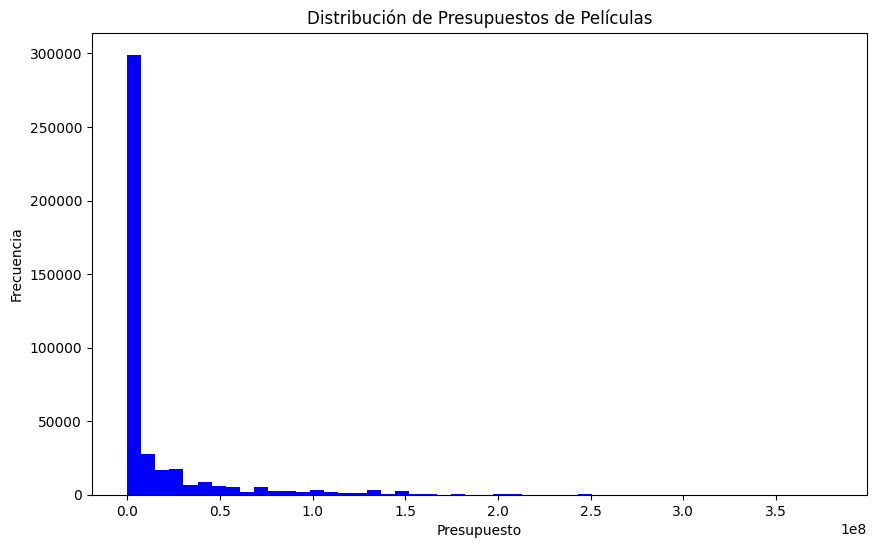

In [10]:


# Verifica que la columna 'presupuesto' esté en el DataFrame
if 'presupuesto' in df.columns:
    plt.figure(figsize=(10, 6))
    plt.hist(df['presupuesto'], bins=50, color='blue')
    plt.title('Distribución de Presupuestos de Películas')
    plt.xlabel('Presupuesto')
    plt.ylabel('Frecuencia')
    plt.show()
else:
    print("La columna 'presupuesto' no está en el DataFrame.")



Grafico de lo popular que fueron las peliculas por año

In [16]:
file_path = 'C:/Users/jrgsi/OneDrive/Escritorio/PROUECTOS HENRY/SISTEMA DE RECOMENDACION PELICULAS/datos/movies_dataset_desanidado.csv'

# Calculamos la popularidad promedio por año de estreno
popularidad_por_anio = movies_dataset_desanidado.groupby('anio_estreno')['popularidad'].mean()

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(popularidad_por_anio.index, popularidad_por_anio.values)
plt.title('Popularidad Promedio por Año de Estreno')
plt.xlabel('Año de Estreno')
plt.ylabel('Popularidad Promedio')
plt.xticks(rotation=45)  # Rotar etiquetas en el eje X si hay muchos años
plt.tight_layout()       # Ajuste para evitar solapamientos
plt.show()



KeyError: 'anio_estreno'